## **Imoprtant Library**

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier



**Read Data**

In [2]:
df=pd.read_csv('/kaggle/input/healthcare-diabetes/Healthcare-Diabetes.csv')
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [4]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


## **Data Cleaning**

**Check Missing value**

In [5]:
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Duplicated Data**

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2763    False
2764    False
2765    False
2766    False
2767    False
Length: 2768, dtype: bool

## **Data Analysis**

**Data Represenation**

**Pregnancies**

In [7]:
df['Pregnancies'].value_counts()

Pregnancies
1     491
0     412
2     387
3     270
4     259
5     198
6     181
7     145
8     134
9      98
10     78
11     35
13     32
12     32
14      9
17      4
15      3
Name: count, dtype: int64

<Axes: title={'center': 'Top of 10 Pregnancies'}, ylabel='Pregnancies'>

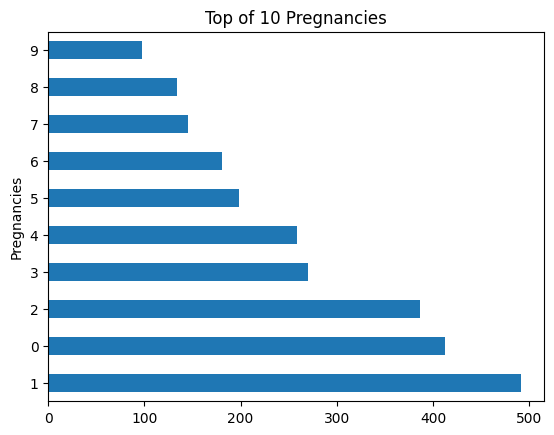

In [8]:
df['Pregnancies'].value_counts().head(10).plot(kind='barh', title='Top of 10 Pregnancies')

**Show outlier**

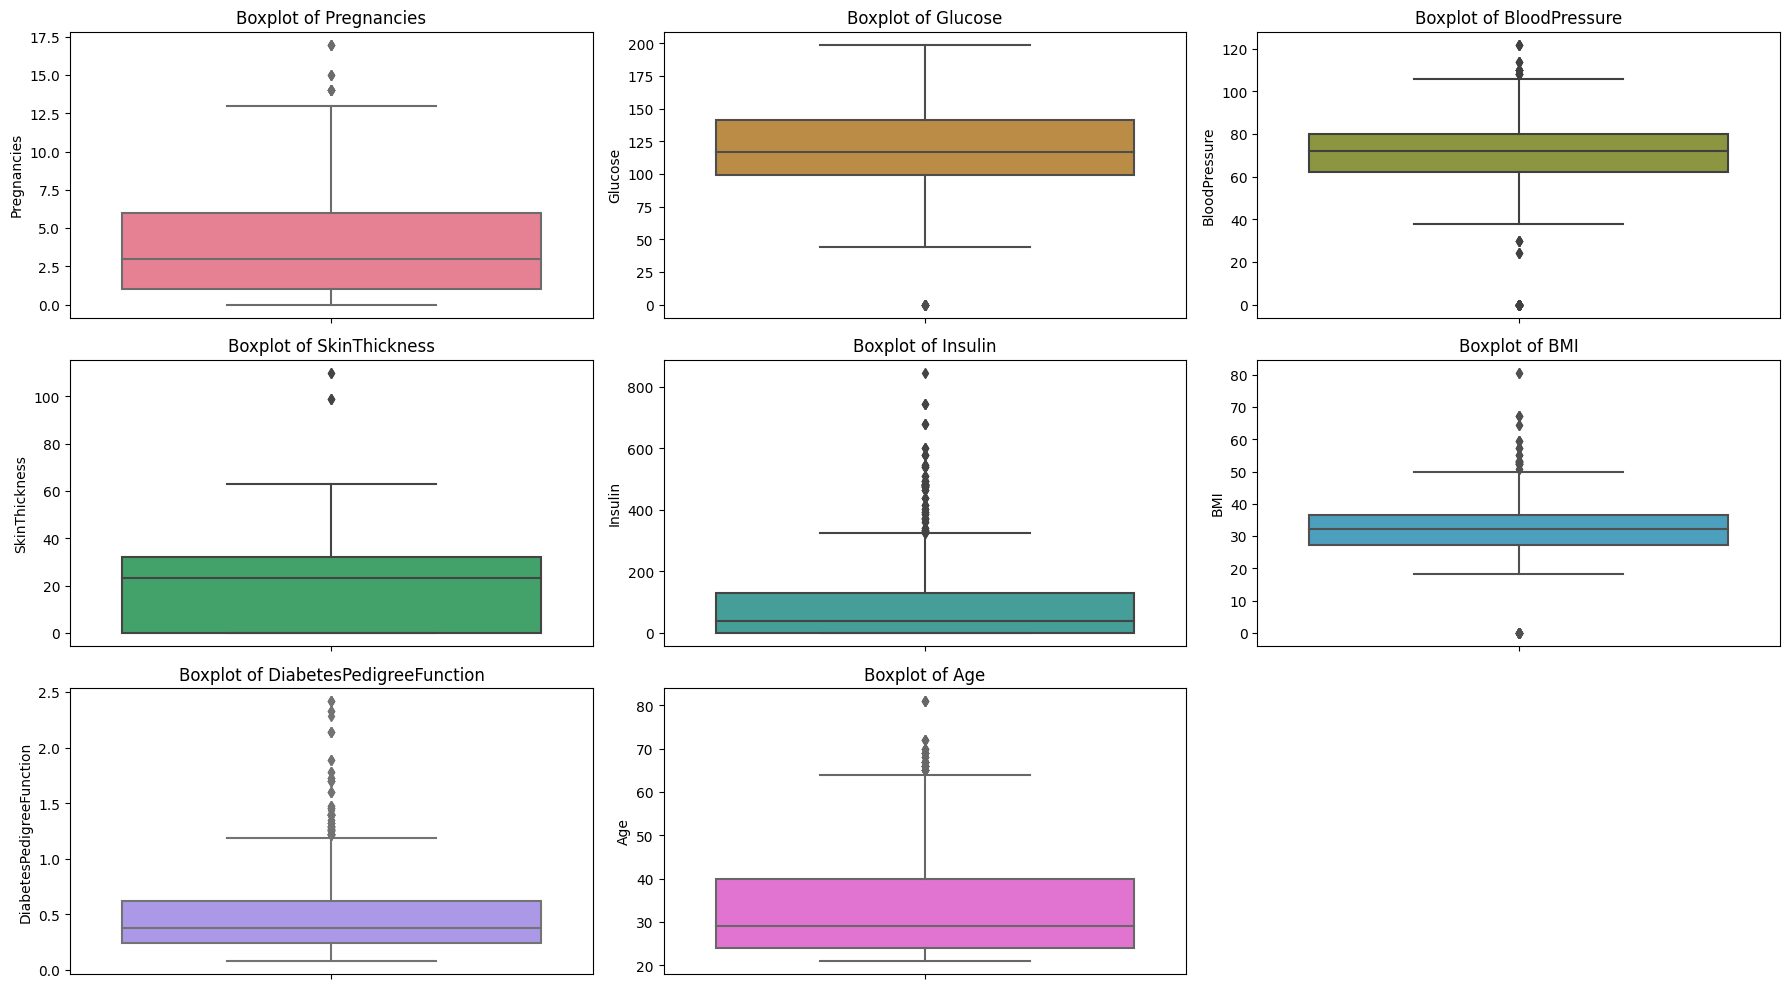

In [9]:
numerical_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# Define a color palette with as many colors as numerical_cols
palette = sns.color_palette("husl", len(numerical_cols))

plt.figure(figsize=(18, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color=palette[i-1])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


**Outcome**

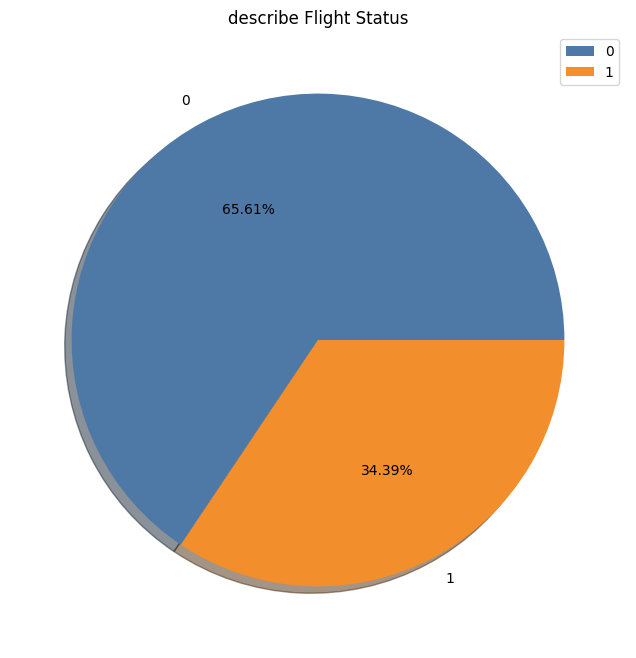

In [10]:
consistent_colors = ['#4E79A7', '#F28E2B', '#E15759', '#76B7B2', '#59A14F', '#EDC948', '#B07AA1', '#FF9DA7']

plt.figure(figsize=(14,8))
plt.pie(df['Outcome'].value_counts().values,
        labels=df['Outcome'].value_counts().index,
        colors=consistent_colors[:len(df['Outcome'].value_counts())],
        shadow=True,
        autopct="%1.2f%%",
        )
plt.title('describe Flight Status')
plt.legend()
plt.show()

<Figure size 1000x800 with 0 Axes>

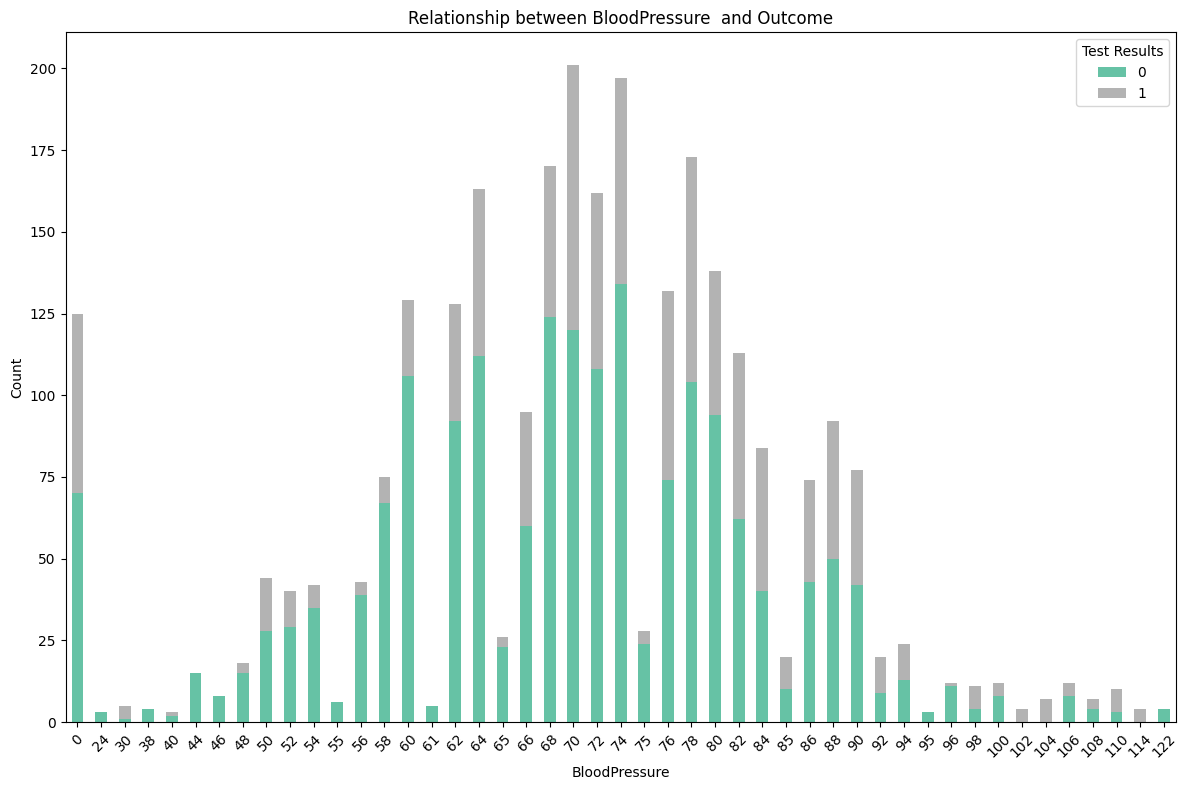

In [11]:
plt.figure(figsize=(10,8))
cross_tab = pd.crosstab(df['BloodPressure'], df['Outcome'])
cross_tab.plot(kind='bar', stacked=True, colormap='Set2', figsize=(12,8))
plt.title('Relationship between BloodPressure  and Outcome')
plt.xlabel('BloodPressure')
plt.ylabel('Count')
plt.legend(title='Test Results')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Descriptive statistics of Glucose by Outcome:
          count        mean        std  min    25%    50%    75%    max
Outcome                                                                
0        1816.0  110.419604  26.392505  0.0   93.0  107.0  125.0  197.0
1         952.0  141.481092  31.986618  0.0  119.0  140.0  167.0  199.0


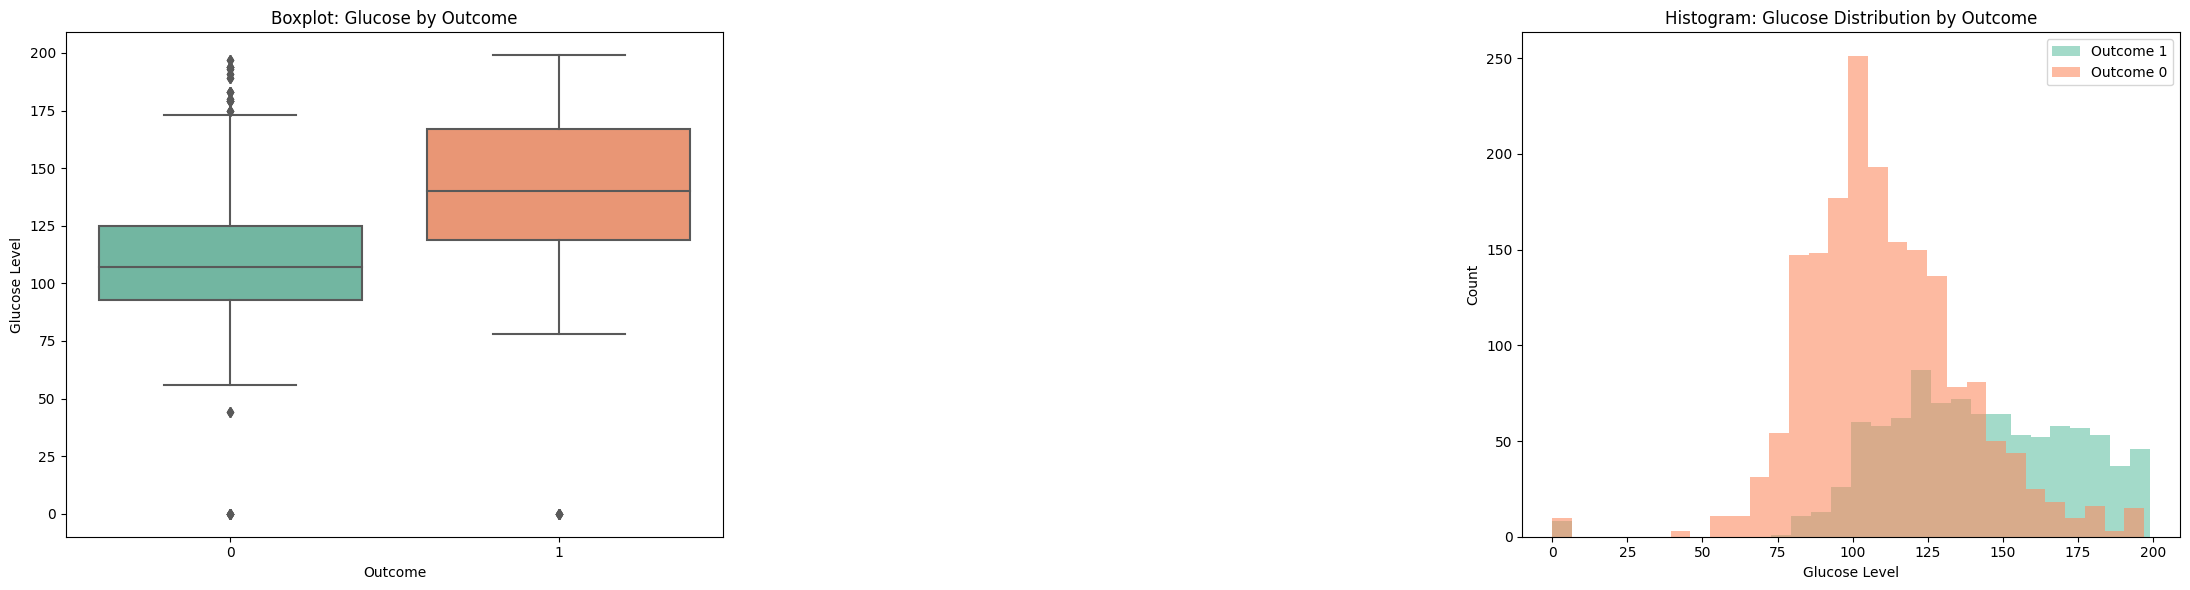


Mean Glucose by Outcome:
Outcome
0    110.419604
1    141.481092
Name: Glucose, dtype: float64

Median Glucose by Outcome:
Outcome
0    107.0
1    140.0
Name: Glucose, dtype: float64

Standard Deviation of Glucose by Outcome:
Outcome
0    26.392505
1    31.986618
Name: Glucose, dtype: float64


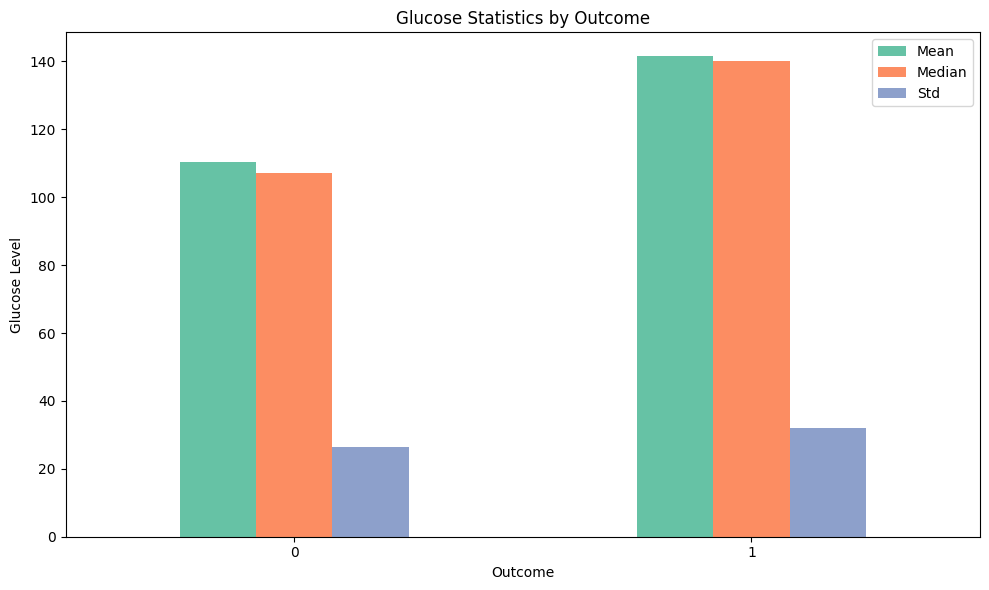


Overview:
Patients with Outcome=1 (diabetes positive) tend to have higher mean and median Glucose levels compared to Outcome=0 (diabetes negative).
The boxplot and histogram show that the distribution of Glucose is shifted higher for Outcome=1, and the histogram confirms more high-Glucose cases in the positive group.
This suggests Glucose is a strong indicator for diabetes outcome in this dataset.


In [12]:
# Overview: How Glucose Levels Affect Diabetes Outcome

# 1. Show descriptive statistics for Glucose by Outcome
glucose_stats = df.groupby('Outcome')['Glucose'].describe()
print("Descriptive statistics of Glucose by Outcome:")
print(glucose_stats)

# 2. Visualize Glucose distribution for each Outcome using boxplot and histogram (violin plot removed)

fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# Boxplot
sns.boxplot(x='Outcome', y='Glucose', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Boxplot: Glucose by Outcome')
axes[0].set_xlabel('Outcome')
axes[0].set_ylabel('Glucose Level')

# Leave axes[1] empty (since violin plot is deleted)
axes[1].axis('off')

# Histogram
for outcome, color in zip(df['Outcome'].unique(), ['#66c2a5', '#fc8d62']):
    subset = df[df['Outcome'] == outcome]
    axes[2].hist(subset['Glucose'], bins=30, alpha=0.6, label=f'Outcome {outcome}', color=color)
axes[2].set_title('Histogram: Glucose Distribution by Outcome')
axes[2].set_xlabel('Glucose Level')
axes[2].set_ylabel('Count')
axes[2].legend()

plt.tight_layout()
plt.show()

# 3. Show mean, median, and std of Glucose for each Outcome
mean_glucose = df.groupby('Outcome')['Glucose'].mean()
median_glucose = df.groupby('Outcome')['Glucose'].median()
std_glucose = df.groupby('Outcome')['Glucose'].std()

print("\nMean Glucose by Outcome:")
print(mean_glucose)
print("\nMedian Glucose by Outcome:")
print(median_glucose)
print("\nStandard Deviation of Glucose by Outcome:")
print(std_glucose)

# 4. Bar plot for mean, median, and std
summary_df = pd.DataFrame({
    'Mean': mean_glucose,
    'Median': median_glucose,
    'Std': std_glucose
})

summary_df.plot(kind='bar', figsize=(10,6), color=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Glucose Statistics by Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose Level')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 5. Brief textual overview
print("\nOverview:")
print("Patients with Outcome=1 (diabetes positive) tend to have higher mean and median Glucose levels compared to Outcome=0 (diabetes negative).")
print("The boxplot and histogram show that the distribution of Glucose is shifted higher for Outcome=1, and the histogram confirms more high-Glucose cases in the positive group.")
print("This suggests Glucose is a strong indicator for diabetes outcome in this dataset.")


Correlation of features with Outcome:
Pregnancies                 0.223796
Glucose                     0.460644
BloodPressure               0.072900
SkinThickness               0.075603
Insulin                     0.123646
BMI                         0.280928
DiabetesPedigreeFunction    0.160664
Age                         0.237050
Name: Outcome, dtype: float64


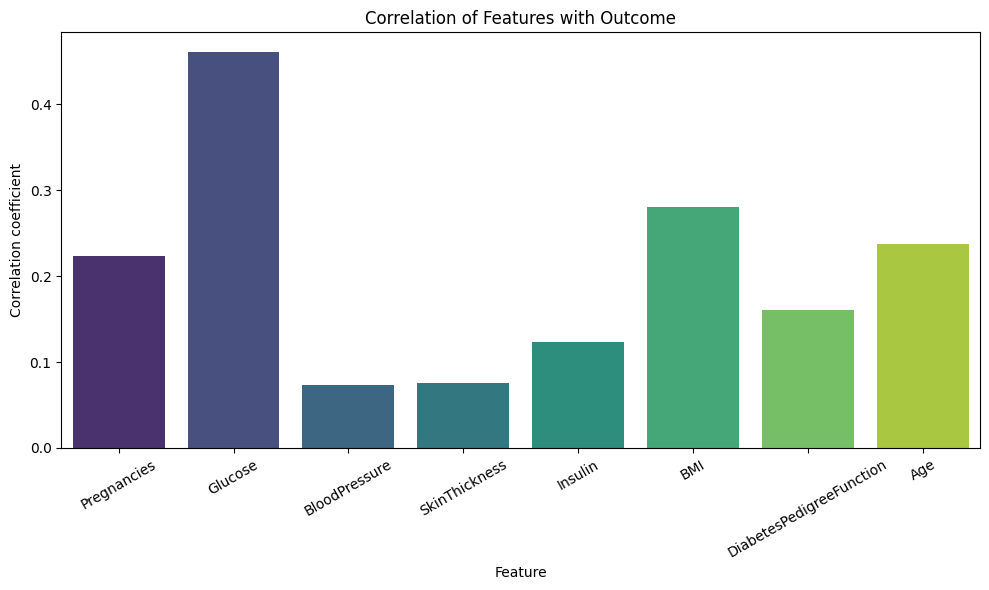

In [13]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
            'BMI', 'DiabetesPedigreeFunction', 'Age']
correlations = df[features + ['Outcome']].corr()['Outcome'].loc[features]

print("Correlation of features with Outcome:")
print(correlations)

# Optional: Visualize the correlations as a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=correlations.index, y=correlations.values, palette='viridis')
plt.title('Correlation of Features with Outcome')
plt.ylabel('Correlation coefficient')
plt.xlabel('Feature')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## **Data modeling**

**Data Scaleing**

In [14]:
from sklearn.preprocessing import RobustScaler

scale_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']


scaler = RobustScaler()


df_scaled = df.copy()
df_scaled[scale_cols] = scaler.fit_transform(df[scale_cols])


print(df_scaled[scale_cols].head())


    Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0  0.738095       0.000000        0.37500 -0.284615  0.150134   
1 -0.761905      -0.333333        0.18750 -0.284615 -0.600536   
2  1.571429      -0.444444       -0.71875 -0.284615 -0.954424   
3 -0.666667      -0.333333        0.00000  0.438462 -0.439678   
4  0.476190      -1.777778        0.37500  1.007692  1.168901   

   DiabetesPedigreeFunction  
0                  0.663158  
1                 -0.063158  
2                  0.781579  
3                 -0.547368  
4                  5.034211  


In [15]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


DecisionTreeClassifier Validation Accuracy: 0.9819

DecisionTreeClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       370
           1       0.99      0.95      0.97       184

    accuracy                           0.98       554
   macro avg       0.99      0.97      0.98       554
weighted avg       0.98      0.98      0.98       554



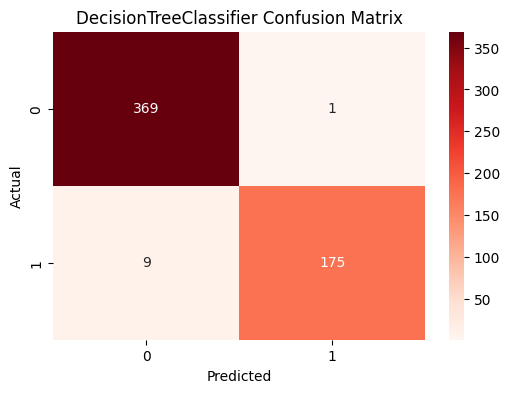

In [17]:
# DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_val_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_val_pred)
dt_class_report = classification_report(y_test, dt_val_pred)
dt_conf_matrix = confusion_matrix(y_test, dt_val_pred)

print("\nDecisionTreeClassifier Validation Accuracy: {:.4f}".format(dt_accuracy))
print("\nDecisionTreeClassifier Classification Report:\n", dt_class_report)
plt.figure(figsize=(6,4))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.title('DecisionTreeClassifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()




RandomForestClassifier Validation Accuracy: 0.9765

RandomForestClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       370
           1       0.99      0.94      0.96       184

    accuracy                           0.98       554
   macro avg       0.98      0.97      0.97       554
weighted avg       0.98      0.98      0.98       554



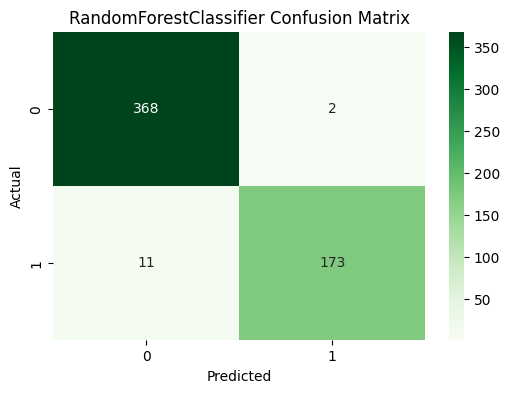

In [18]:
# RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_val_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_val_pred)
rf_class_report = classification_report(y_test, rf_val_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_val_pred)

print("\nRandomForestClassifier Validation Accuracy: {:.4f}".format(rf_accuracy))
print("\nRandomForestClassifier Classification Report:\n", rf_class_report)
plt.figure(figsize=(6,4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('RandomForestClassifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


XGBoostClassifier Validation Accuracy: 0.9892

XGBoostClassifier Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       370
           1       0.99      0.98      0.98       184

    accuracy                           0.99       554
   macro avg       0.99      0.99      0.99       554
weighted avg       0.99      0.99      0.99       554



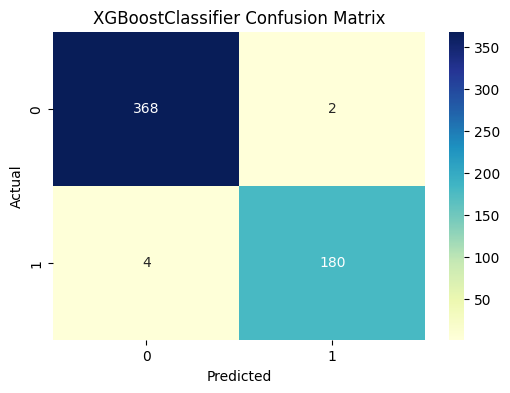

In [19]:
try:
    from xgboost import XGBClassifier
    xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_val_pred = xgb_model.predict(X_test)
    xgb_accuracy = accuracy_score(y_test, xgb_val_pred)
    xgb_class_report = classification_report(y_test, xgb_val_pred)
    xgb_conf_matrix = confusion_matrix(y_test, xgb_val_pred)

    print("\nXGBoostClassifier Validation Accuracy: {:.4f}".format(xgb_accuracy))
    print("\nXGBoostClassifier Classification Report:\n", xgb_class_report)
    plt.figure(figsize=(6,4))
    sns.heatmap(xgb_conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
    plt.title('XGBoostClassifier Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
except ImportError:
    print("XGBoost is not installed.")

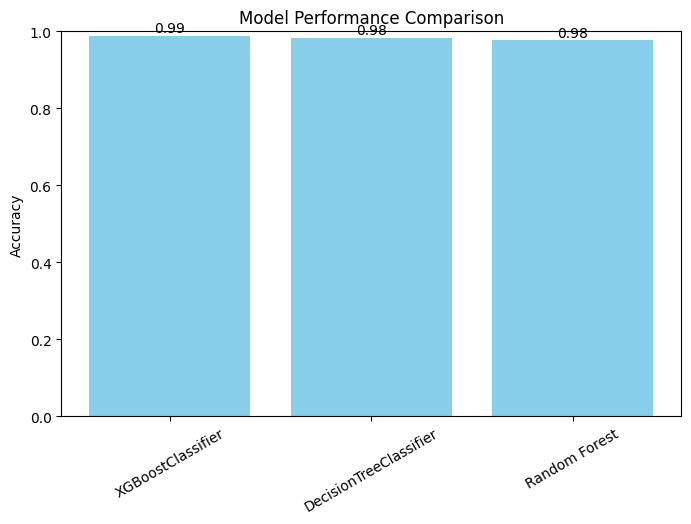

the best model: XGBoostClassifier Accuracy 0.99


In [20]:
#show the best model to deployment
results = {
    "Random Forest": 0.9765,
    "XGBoostClassifier": 0.9892,
    "DecisionTreeClassifier": 0.9819
}

results = dict(sorted(results.items(), key=lambda x: x[1], reverse=True))


plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
for i, v in enumerate(results.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=10)
plt.xticks(rotation=30)
plt.show()

#Test the models
best_model_name = max(results, key=results.get)
best_score = results[best_model_name]
print(f"the best model: {best_model_name} Accuracy {best_score:.2f}")


In [21]:
import joblib #library to deployment the best model

joblib.dump(best_model_name, "best_model.pkl")


['best_model.pkl']